In [23]:
# Read in libraries needed for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Read the xlsx file
df = pd.read_excel('ireland_france_2_years_beef.xlsx')

# Print the data frame
df

,Year,Week,Begin Date,End Date,Member State,Category,Product,Price
0,2022,50,2022-12-12,2022-12-18,Ireland,Young cattle,Z O3,406.10
1,2022,50,2022-12-12,2022-12-18,Ireland,Young cattle,Z O2,416.31
2,2022,50,2022-12-12,2022-12-18,Ireland,Young cattle,Z U3,491.00
3,2022,50,2022-12-12,2022-12-18,Ireland,Young cattle,Z R3,497.31
4,2022,50,2022-12-12,2022-12-18,Ireland,Young cattle,Z R2,510.00
...,...,...,...,...,...,...,...,...
6145,2021,3,2021-01-18,2021-01-24,France,Bulls,B R3,302.00
6146,2021,2,2021-01-11,2021-01-17,Ireland,Bulls,B R3,272.63
6147,2021,2,2021-01-11,2021-01-17,France,Bulls,B R3,301.00
6148,2021,1,2021-01-04,2021-01-10,Ireland,Bulls,B R3,282.74


C:\Users\naomi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\naomi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


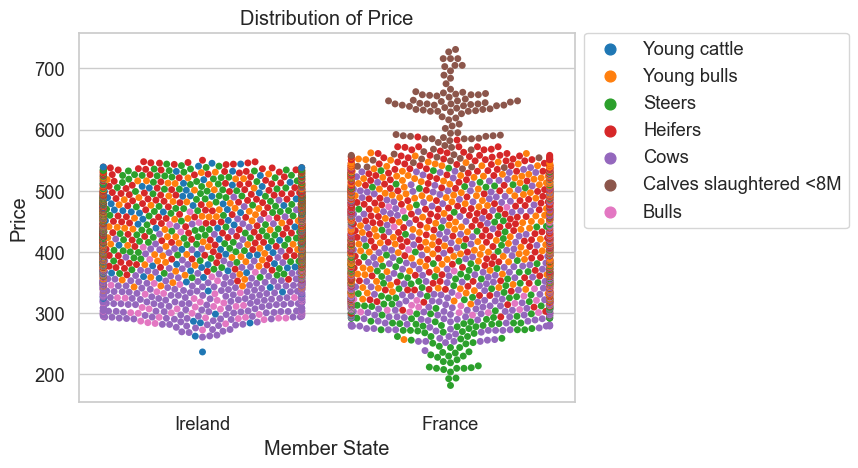

In [25]:
plt.title('Distribution of Price')
sns.swarmplot(data = df, x=df['Member State'], y=df['Price'], hue = 'Category')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
#plt.savefig('./Images/Img_1_BusDataframe_histogram.svg')

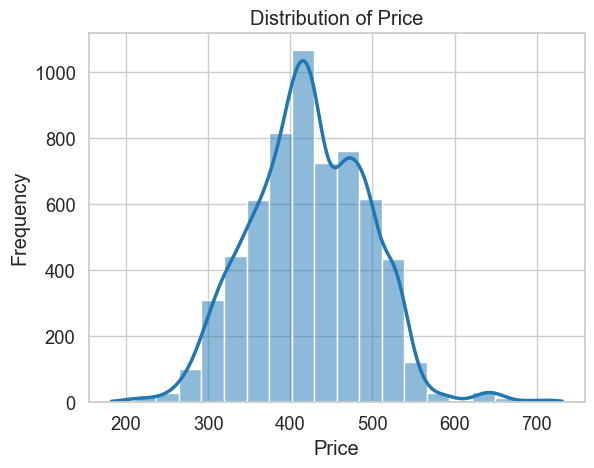

In [26]:
sns.histplot(data = df, x = 'Price', bins = 20, kde = True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency');
#plt.savefig('./Images/Img_1_BusDataframe_histogram.svg')

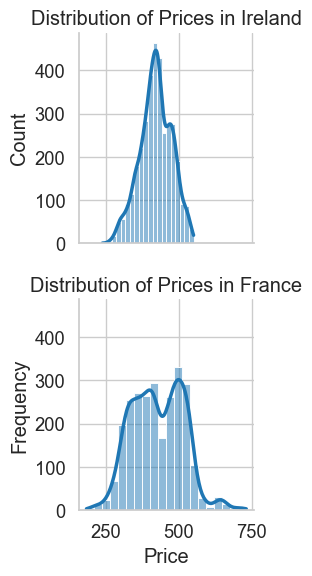

In [27]:
import seaborn as sns

# Create a facet grid with the 'Country' column as the rows
g = sns.FacetGrid(df, row="Member State")

# Create a histogram plot on the grid with the 'Price' column as the x-axis
g.map(sns.histplot, "Price", bins=20, kde=True)

# Set the plot titles and labels
g.set_titles("Distribution of Prices in {row_name}")
plt.xlabel('Price')
plt.ylabel('Frequency');
#plt.savefig('./Images/Img_1_BusDataframe_histogram.svg')

In [40]:
# Drop the unit column
df = df.drop(columns=['Begin Date', 'End Date'])

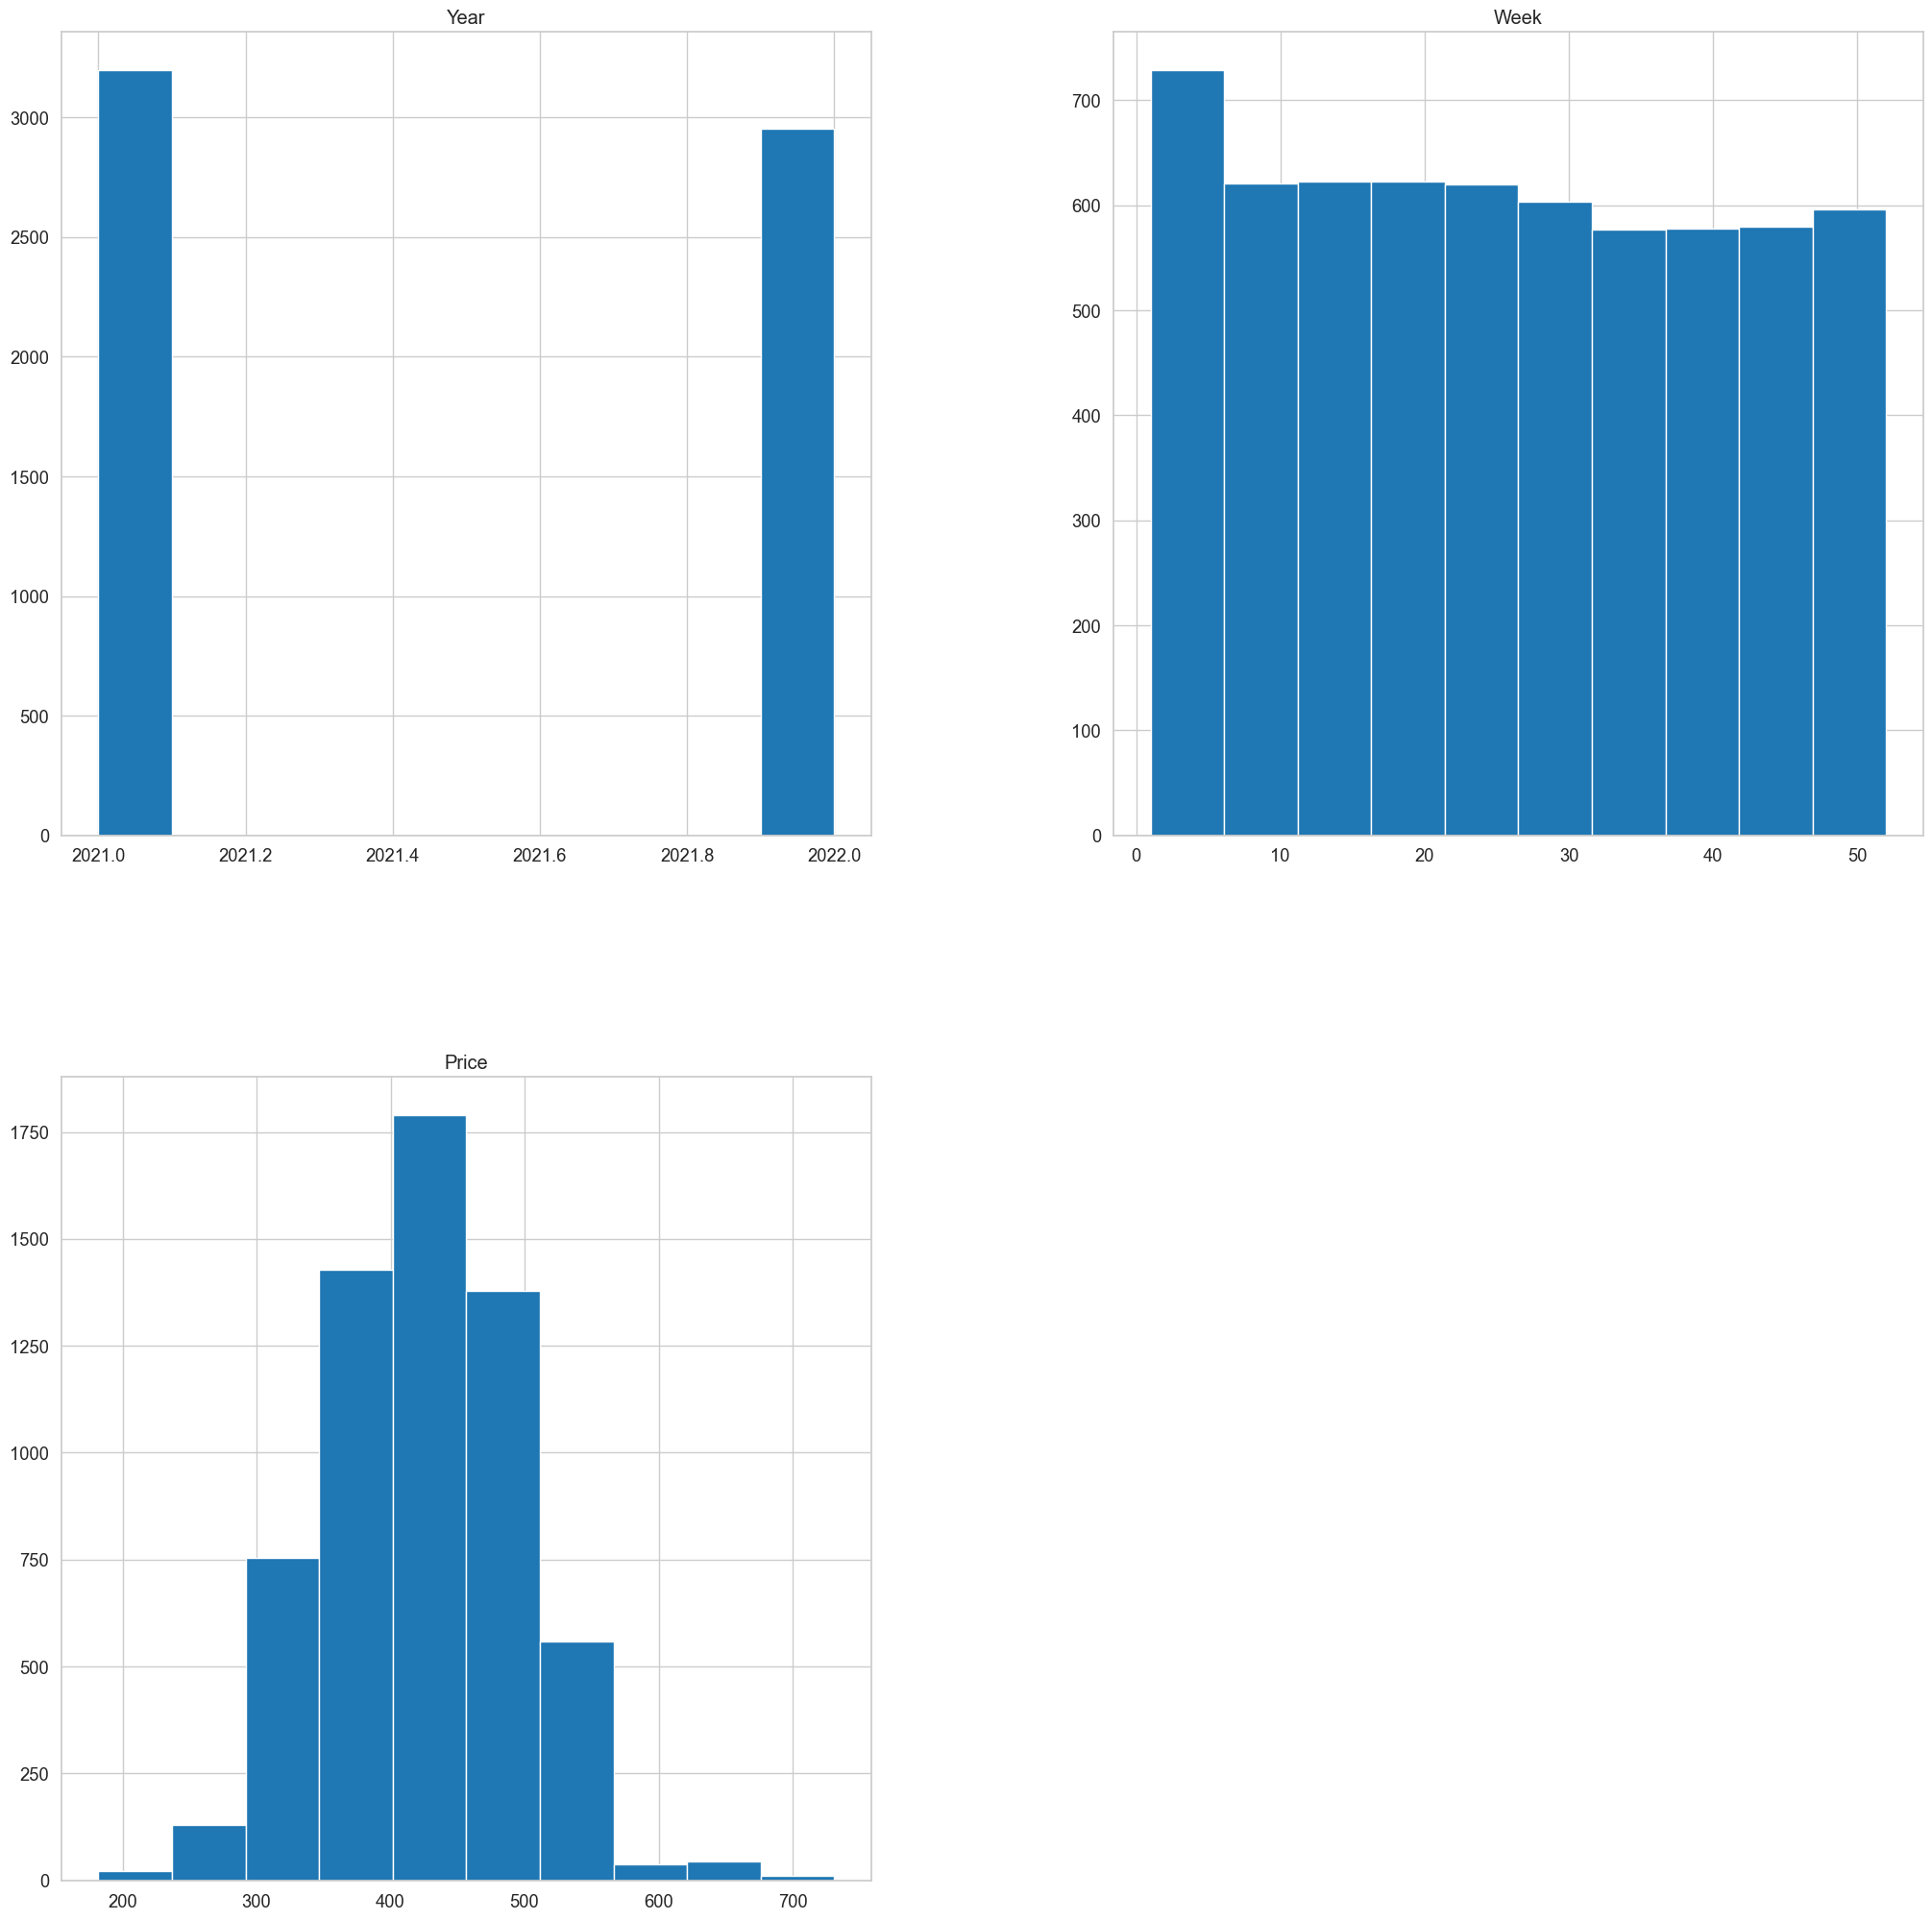

In [41]:
#I dont think this is necessary
%matplotlib inline
df.hist(figsize=(25,25));#
#plt.savefig('./Images/Img_1_BusDataframe_histogram.svg')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6150 entries, 0 to 6149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          6150 non-null   int64  
 1   Week          6150 non-null   int64  
 2   Member State  6150 non-null   object 
 3   Category      6150 non-null   object 
 4   Product       6150 non-null   object 
 5   Price         6150 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 288.4+ KB


In [43]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,Year,Week,Price
count,6150.00,6150.00,6150.00
mean,2021.48,25.69,423.03
std,0.50,14.71,70.99
min,2021.00,1.00,182.00
25%,2021.00,13.00,375.02
50%,2021.00,25.00,420.93
75%,2022.00,38.00,473.93
max,2022.00,52.00,731.00


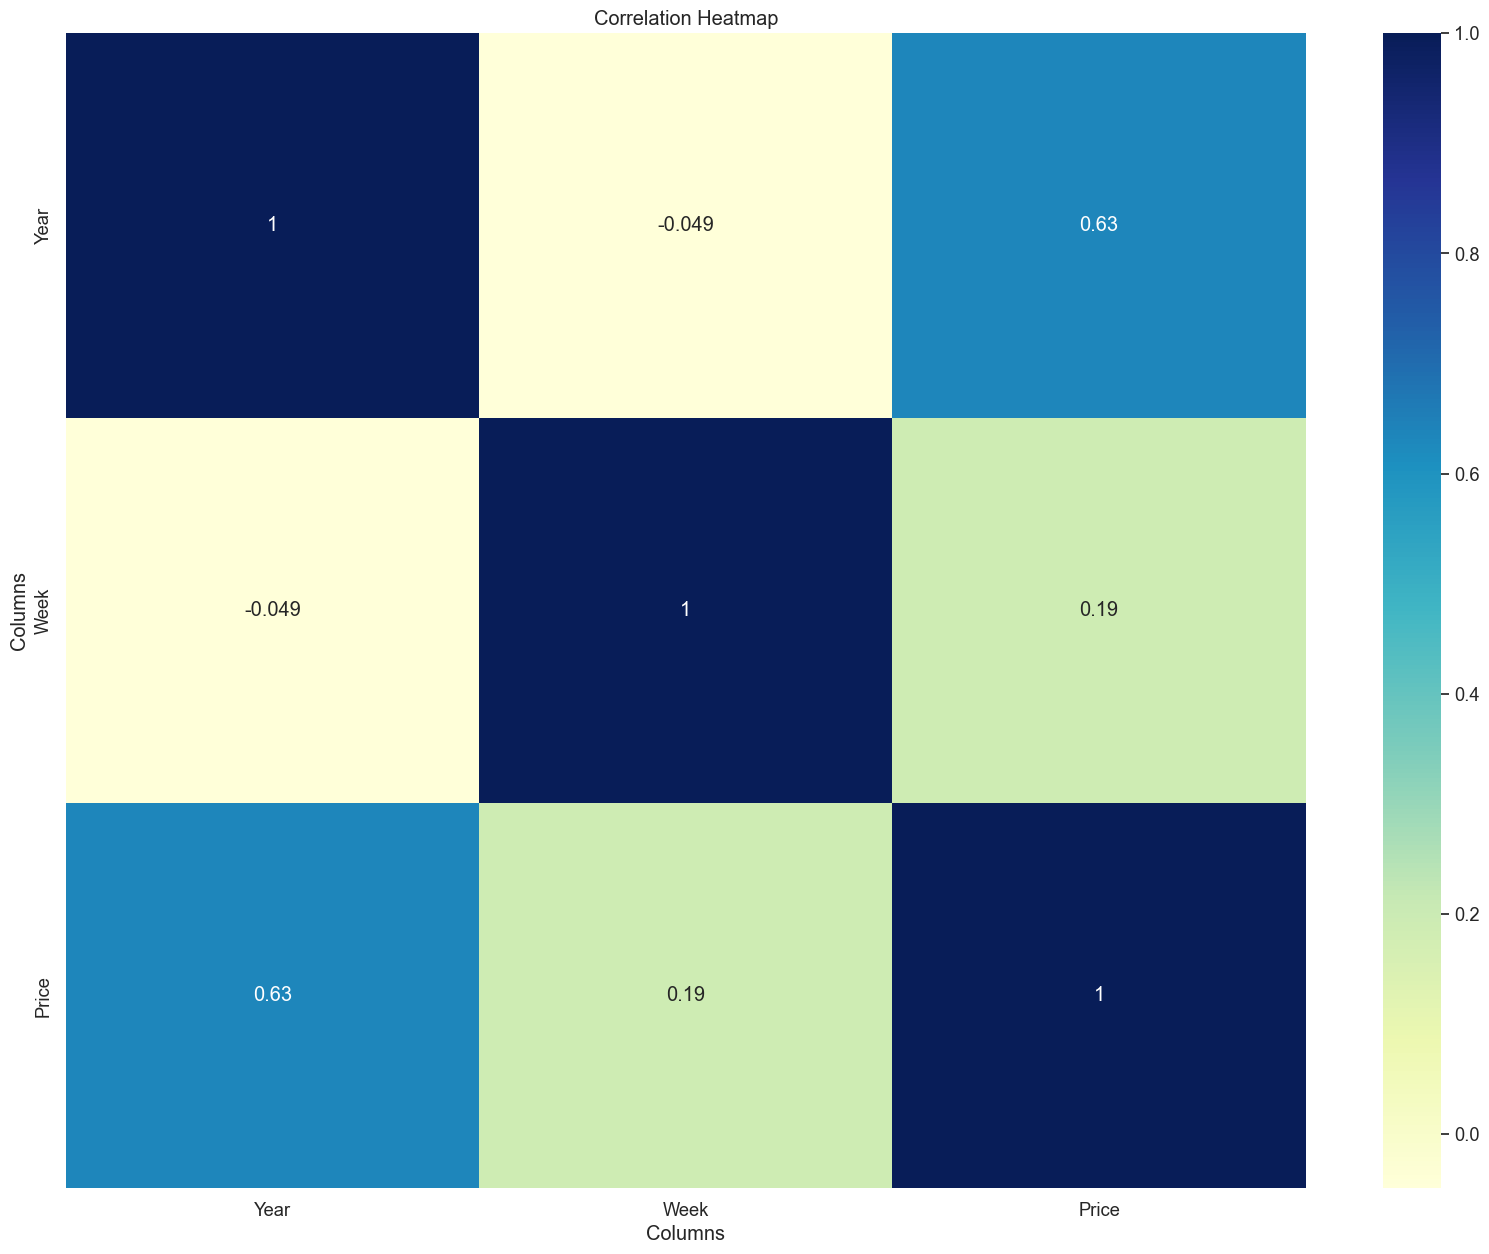

In [44]:
# Compute the Pearson correlation between all pairs of columns
c_df = df.corr(method='pearson')

# Create a figure and axes
fig, ax = plt.subplots(figsize=(20, 15))

# Use the seaborn heatmap function to create a heatmap of the correlations
sns.heatmap(c_df, cmap='YlGnBu', annot=True)

# Set the plot title and labels
plt.title('Correlation Heatmap')
plt.xlabel('Columns')
plt.ylabel('Columns')

# Show the plot
plt.show()

#plt.savefig('./Images/Img_13_BusDataframeCorHeatmap.svg')

The custom_barplot function is a custom function for visualizing the distribution of a column in a Pandas DataFrame. The function takes a DataFrame (df1) and a column name (col1) as input and creates a figure with four subplots: a histogram, a density plot, a Q-Q plot, and a box plot of the column.

The first two lines of the function check the size of the column and, if it has more than 5000 values, select a random sample of 5000 values from the column. This is done to avoid warnings about the size of the data being used with the Shapiro-Wilk test, which is unreliable with sample sizes larger than 5000, and for performance reasons.

The function then creates a figure and a 2x2 grid of subplots using plt.subplots. The histogram and density plot of the column are plotted using the plot method of the Pandas Series with the kind parameter set to 'hist' and 'kde', respectively. The Q-Q plot is created using the probplot function from the scipy.stats module. The box plot of the column is plotted using the plot method of the Pandas Series with the kind parameter set to 'box'.

Finally, the function calls the shapiro_test function to perform a Shapiro-Wilk test of normality on the column and returns the result as a tuple containing the status of the test (either 'Normal' or 'Not normal'), the color to use for the plot title, and the p-value of the test. The function then adds a plot title to the figure with the result of the normality test and the p-value.

In [52]:
def shapiro_test(x):
    p_val = stats.shapiro(x)[1]
    status = 'passed'
    color = 'blue'
    if p_val < 0.05:
        status = 'failed'
        color = 'red'
    return status, color, p_val

def custom_barplot(df, col1=''):
    if len(df[col1]) > 5000: # added this to the function because of warnings about the size of data being used with shapiro test
            sampleSize = 5000
    else:
        sampleSize = len(df[col1])
    df = df.sample(sampleSize) #shapiro test is unreliable over 5000 https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test and performance reasons
    f, ax = plt.subplots(2,2, figsize=(11.5, 11.5))
    ax = ax.reshape(-1)
    df[col1].plot(ax=ax[0], kind='hist')
    ax[0].set_title('Histogram of {}'.format(col1))
    df[col1].plot(ax=ax[1], kind='kde')
    ax[1].set_title('Density Plot of {}'.format(col1))
    ax3 = plt.subplot(223)
    stats.probplot(df[col1], plot=plt)
    ax[2].set_title('QQ Plot of {}'.format(col1))
    df[col1].plot(ax=ax[3], kind='box')
    ax[3].set_title('Box Plot of {}'.format(col1))
    status, color, p_val = shapiro_test(df[col1]) 
    f.suptitle('Normality test for {} {} (p_value = {})'.format(col1, status, p_val), color=color, fontsize=12)

There are a few ways you can improve the code:

Make the custom_barplot function more flexible by allowing it to accept multiple columns and countries, and to customize the title and labels of the plots. This way, you can use the function to create plots for different combinations of columns and countries without having to modify the function itself.

Use more descriptive and meaningful variable names. This can make the code easier to understand and maintain.

Use the seaborn library to create the plots. This library provides a variety of high-level plotting functions that can make your plots more visually appealing and easier to create.

Consider using the pandas plot method to create the plots. This method provides a convenient way to create various types of plots using the DataFrame and Series objects.

Use the matplotlib subplots function to create the plots. This function allows you to specify the number of rows and columns of subplots, and returns a tuple of the Figure and Axes objects. This can be more convenient than creating the plots manually.

Use matplotlib tight_layout function to adjust the layout of the plots. This can help avoid overlapping plots and text, and make the plots more visually appealing.

Consider using the scipy anderson_ksamp function to test for normality instead of the shapiro function. The anderson_ksamp

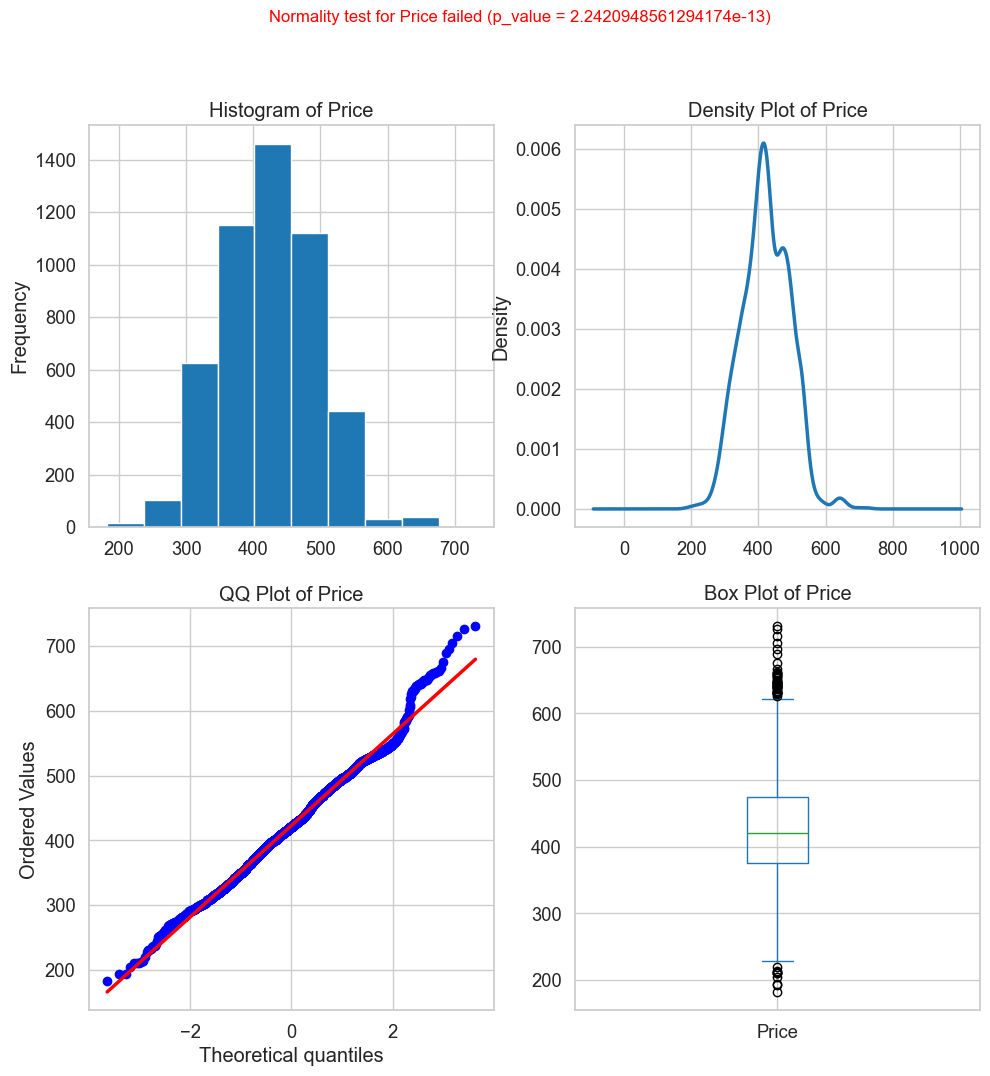

In [54]:
import scipy.stats as stats
#NumericalColumns = [ 'Price']

if len(df) > 5000: # limiting the amount of data that is being sent to the function because of memory issues 
    sampleSize = 5000
else:
    sampleSize = len(df)
for f in ['Price']:
    custom_barplot( df=df.sample(sampleSize), col1=f)

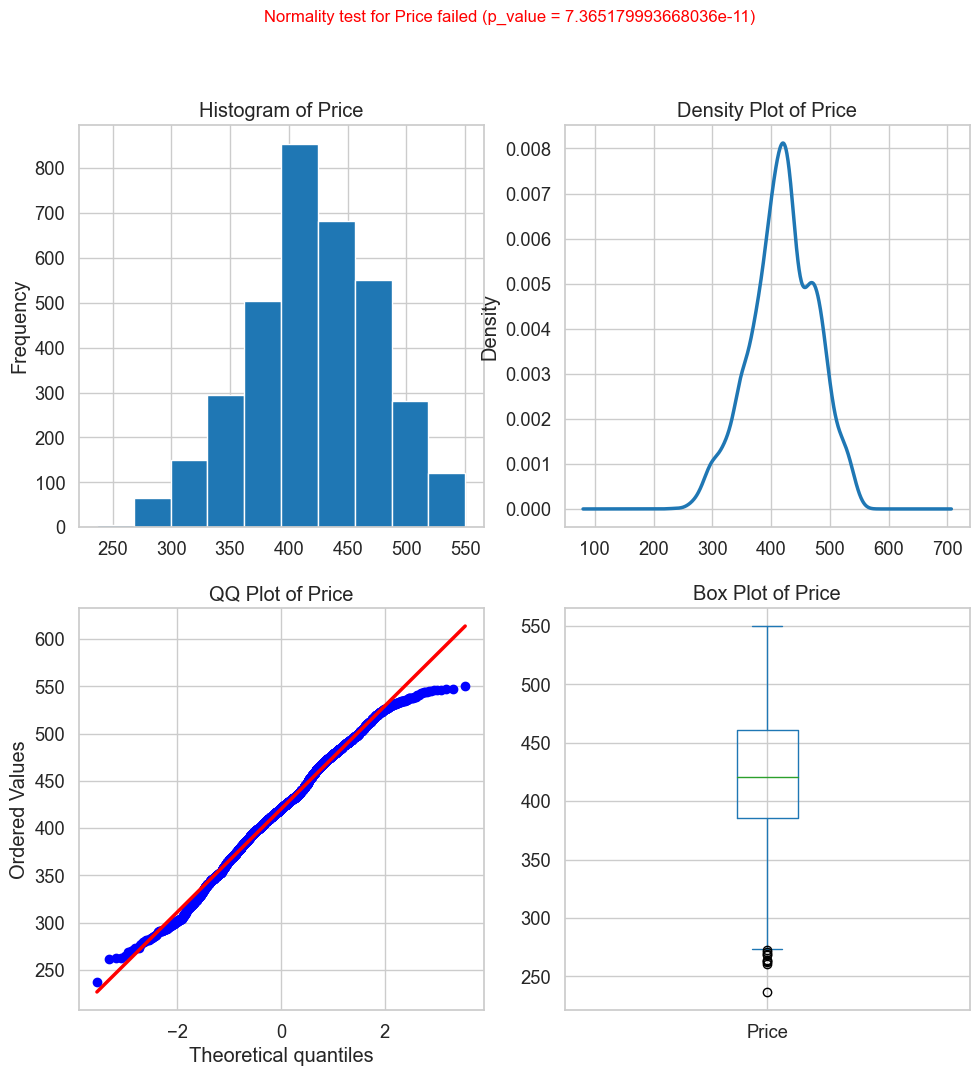

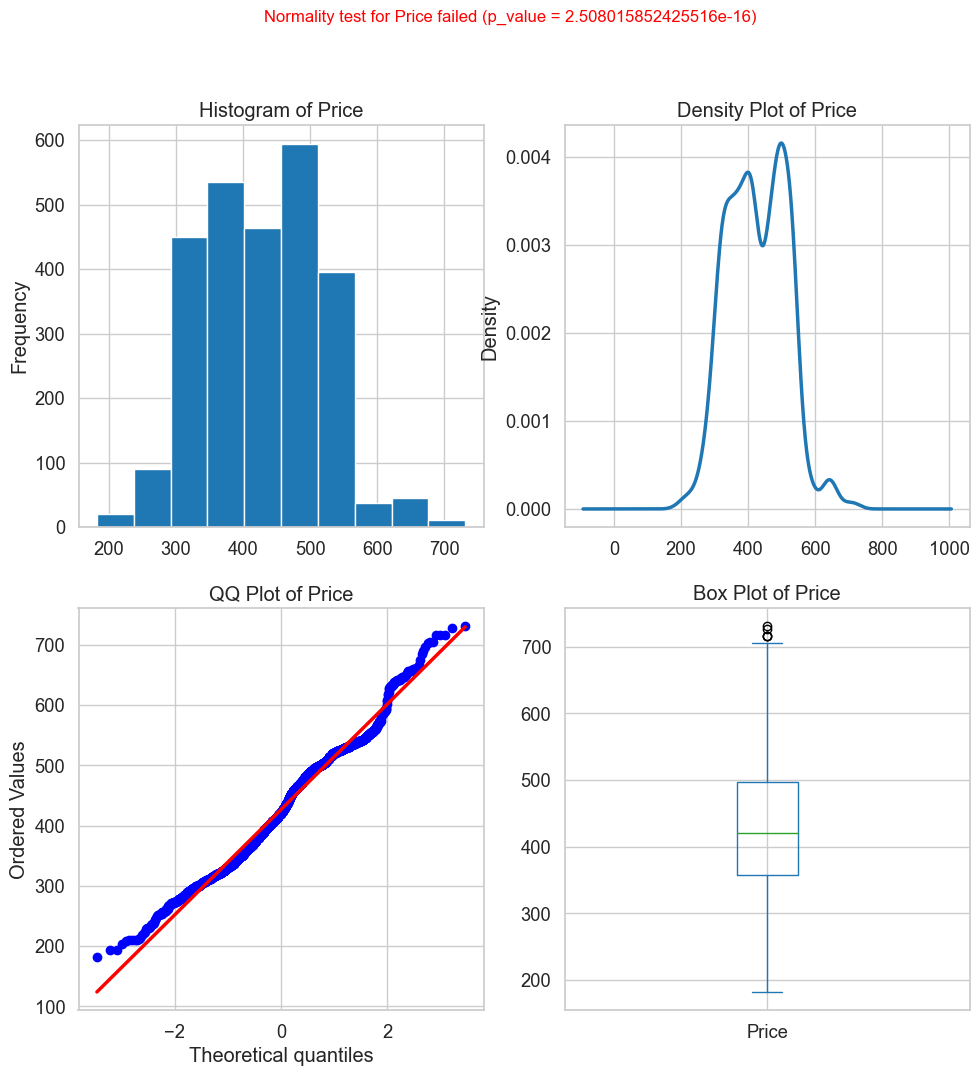

In [56]:
import matplotlib.pyplot as plt

# List of countries
countries = ['Ireland', 'France']

# Loop over countries
for country in countries:
    # Filter dataframe by country
    df_filtered = df[df['Member State'] == country]
    
    # Loop over columns
    for col in ['Price']:
        # Create plot
        custom_barplot(df=df_filtered, col1=col)
        
        # Show plot
        plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

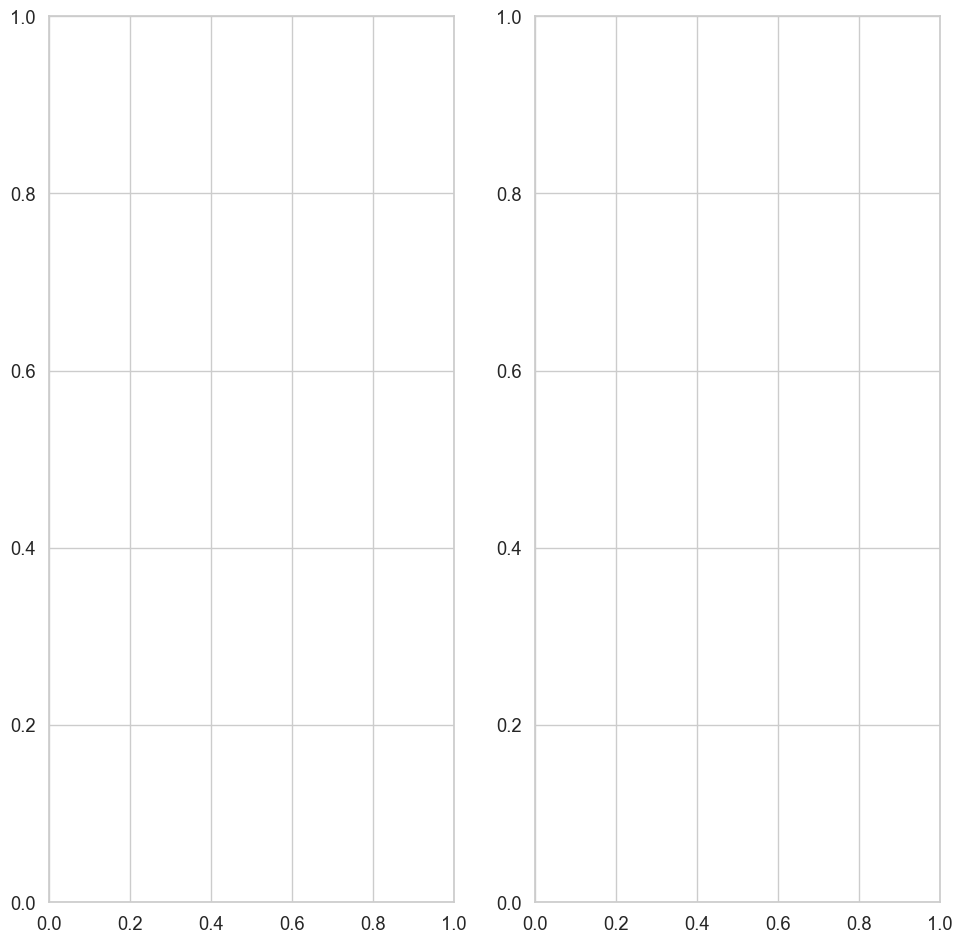

In [58]:
import seaborn as sns

def custom_barplot(df, columns, countries, title, xlabel, ylabel):
    f, ax = plt.subplots(len(columns), len(countries), figsize=(11.5, 11.5))
    
    for i, col in enumerate(columns):
        for j, country in enumerate(countries):
            data = df[df['Member State'] == country][col]
            sns.distplot(data, ax=ax[i, j])
            ax[i, j].set_title(f'{col} in {country}')
            ax[i, j].set_xlabel(xlabel)
            ax[i, j].set_ylabel(ylabel)
    f.suptitle(title, fontsize=12)
    plt.tight_layout()

custom_barplot(df, ['Price'], ['France', 'Ireland'], 'Price distribution in US and UK', 'Price', 'Density')

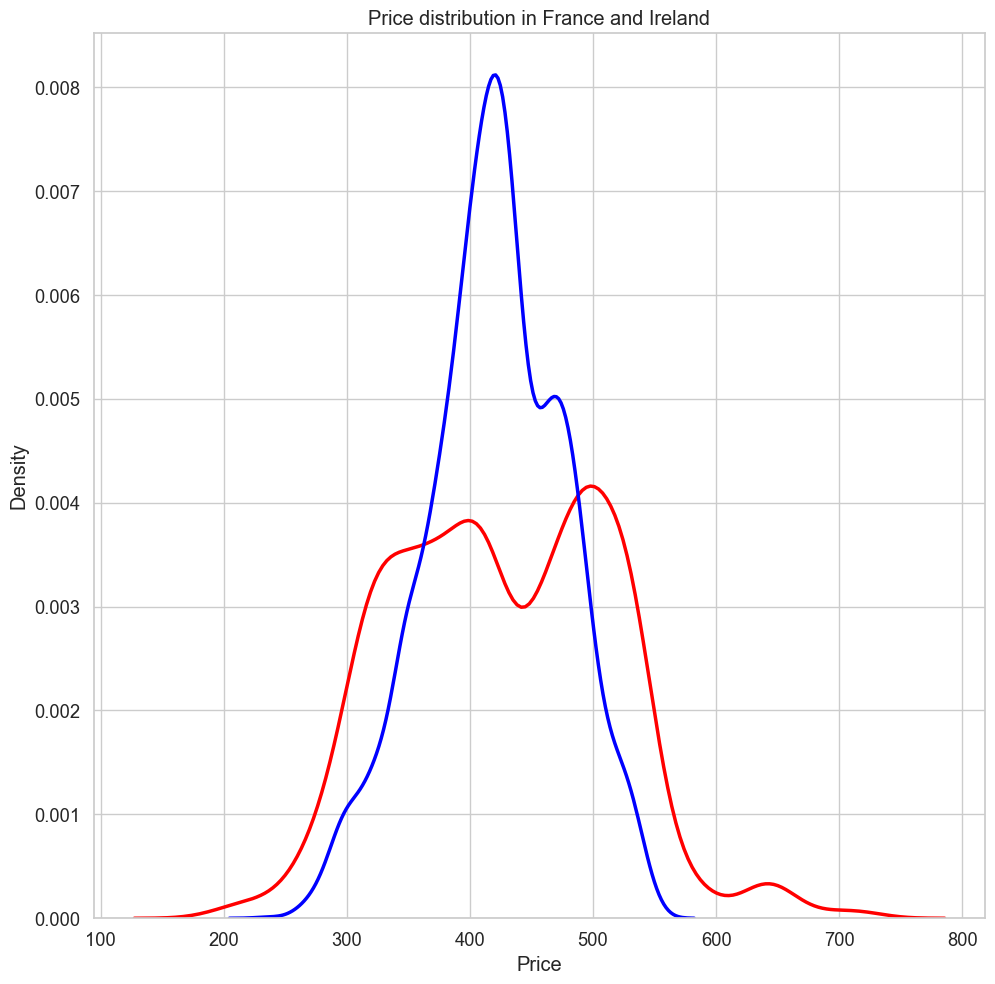

In [59]:
import seaborn as sns

def custom_density_plot(df, countries, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(11.5, 11.5))
    colors = ['red', 'blue']
    for i, country in enumerate(countries):
        data = df[df['Member State'] == country]['Price']
        sns.kdeplot(data, color=colors[i], label=country, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

custom_density_plot(df, ['France', 'Ireland'], 'Price distribution in France and Ireland', 'Price', 'Density')

To improve the code, you can consider the following suggestions:

Instead of using subplots to plot 4 different plots, you can use a single plot and use different color codes to distinguish the plots for different countries. This will make it easier to compare the plots.

You can also consider using a density plot instead of a histogram plot to visualize the distribution of the data. Density plots provide a smooth estimate of the underlying distribution of the data, whereas histograms can be noisy and give a discrete estimate of the distribution.

Instead of using the Shapiro-Wilk test to check for normality, you can use the Anderson-Darling test or the Kolmogorov-Smirnov test, which are more sensitive to deviations from normality. You can also use Q-Q plots to visually check for normality.

Instead of sampling the data to a fixed size, you can use the entire data and only plot a subset of the data using the 'xlim' parameter in the density plot. This will allow you to visualize the entire distribution of the data.

You can also consider using other visualization techniques such as box plots or violin plots to visualize the distribution of the data.

Here is an example of how you can modify the code to plot the density plots for the 'Price' column for two countries, France and Ireland:

